# Assignement 2 - Linear regression with one variable


In this second assignment, you will implement linear regression and get to see it work on data. 


In this part of this exercise, you will implement linear regression with one variable to predict profits for your food company. Suppose you are the CEO of McDonlads and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next.

The file LRdata1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates that its a loss and its not a good city to gather money.

You work is to complete the assignement 2 by filling the missing lines of code


In [2]:
# Some useful libraries to use in this assignment

from numpy import loadtxt, zeros, ones, array, linspace, logspace
from pylab import scatter, show, title, xlabel, ylabel, plot, contour
import matplotlib
import numpy as np

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

# First step

We are going to plot the dataset and see if we can apply linear regression to fit the data.

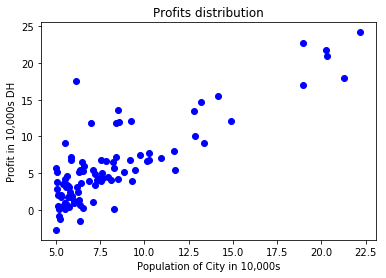

In [3]:
#Load the dataset
data = loadtxt('LRdata1.txt', delimiter=',')
#Plot the data
scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in 10,000s DH')
show()

# Question 1

You have to complete the function compute_cost that has three parameters: X, y and W

In [4]:
#Evaluate the linear regression
def compute_cost(X, y, W):
    '''
    This function will compute the cost for your linear regression model
    '''
    #Number of training samples
    m  = y.size
    
    '''
    print ("X :",X.shape)
    print ("W :",W.shape)
    print ("y :",y.shape)
    '''
    
    # Your code goes here
    
    predictions = X.dot(W).flatten()

    J = ((predictions - y)**2).sum()
    

    # End of your code

    return J/(2*m)

# Question 2

You have to complete the function gradient_descent that has five parameters: X, y, W, alpha and num_iters

alpha: the learning rate

num_iters: the number of iterations before we find the best parameters Ws.

In [5]:
# This fucntion will compute the gradient descent for your linear regression model

def gradient_descent(X, y, W, alpha, num_iters,flag_print):

    m = y.size

    for i in range(num_iters):
        
        """ 
            We will use flatten function because it will return a copy of the array collapsed into one dimension.
            which will be useful for our problem
        """
        
        predictions = X.dot(W).flatten()
                
        # Your code goes here
        
        W[0,0] = W[0,0] - alpha * (predictions - y).sum() / m
        W[1,0] = W[1,0] - alpha * ((X[:,1]*(predictions - y)).sum()) / m
        
        # End of your code
        
        """ 
        it's very useful to print the cost function J in every iteration and see if its decreasing 
            or increasing (in theory it should decrease)
        """
        if(flag_print):
            if(i%1000 == 0):
                print("iteration :",i," J : ",compute_cost(X,y,W))
                print("weights  : ",W.flatten() )
        
    return W

# Question 3

You have to complete the next cell by giving values to two variables: iterations and alpha.

In [6]:
# The model hyperparameters. Play with them by changing their values and see what happened
"""
    In this cell, you should try with different values of the following variables : 
    - iterations : which will the number of times gradient descent will take before it converges to
        the minimum
        
    - alpha : the learning rate. Try these values : 0.01 and 0.02 and 0.03.
"""

# Your initialization goes here

X = data[:, 0]
y = data[:, 1]

#number of training samples
m = y.size

#Add a column of ones to X (interception data)
new_X = ones(shape=(m, 2))
new_X[:, 1] = X

#Here, we initialize W parameters by zero
W = zeros(shape=(2, 1))

#compute and print the initial cost, W after apply gradient descent
print("This is the initial cost J : ",compute_cost(new_X,y,W),"\n")
# Your ode goes here


print("## alpha = 0.01 ##")
gradient_descent(new_X,y,W,0.01,12000,1)

W = zeros(shape=(2, 1)) #initialize W again

print("\n\n## alpha = 0.02 ##")
gradient_descent(new_X,y,W,0.02,12000,1)

W = zeros(shape=(2, 1)) #initialize W again
print("\n\n## alpha = 0.03 ##")
gradient_descent(new_X,y,W,0.03,12000,1)

print("####")
# End of your code

# End of your initialization

This is the initial cost J :  32.072733877455676 

## alpha = 0.01 ##
iteration : 0  J :  6.737190464870007
weights  :  [0.05839135 0.6532885 ]
iteration : 1000  J :  4.515815084502823
weights  :  [-3.24258172  1.1274127 ]
iteration : 2000  J :  4.4780238053864
weights  :  [-3.78826273  1.18223228]
iteration : 3000  J :  4.47699989044271
weights  :  [-3.87808313  1.19125571]
iteration : 4000  J :  4.476972148544673
weights  :  [-3.89286779  1.19274099]
iteration : 5000  J :  4.476971396907136
weights  :  [-3.89530138  1.19298547]
iteration : 6000  J :  4.476971376542307
weights  :  [-3.89570195  1.19302572]
iteration : 7000  J :  4.476971375990544
weights  :  [-3.89576789  1.19303234]
iteration : 8000  J :  4.476971375975595
weights  :  [-3.89577874  1.19303343]
iteration : 9000  J :  4.47697137597519
weights  :  [-3.89578053  1.19303361]
iteration : 10000  J :  4.476971375975179
weights  :  [-3.89578082  1.19303364]
iteration : 11000  J :  4.47697137597518
weights  :  [-3.89578087  1.

/home/heidiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in square
/home/heidiki/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/heidiki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars


iteration : 3000  J :  nan
weights  :  [nan nan]
iteration : 4000  J :  nan
weights  :  [nan nan]
iteration : 5000  J :  nan
weights  :  [nan nan]
iteration : 6000  J :  nan
weights  :  [nan nan]
iteration : 7000  J :  nan
weights  :  [nan nan]
iteration : 8000  J :  nan
weights  :  [nan nan]
iteration : 9000  J :  nan
weights  :  [nan nan]
iteration : 10000  J :  nan
weights  :  [nan nan]
iteration : 11000  J :  nan
weights  :  [nan nan]
####


# Question 4

You have to complete the next cell by computing the initial cost, after that computing W after apply gradient descent

In [88]:
X = data[:, 0]
y = data[:, 1]


#number of training samples
m = y.size

#Add a column of ones to X (interception data)
new_X = ones(shape=(m, 2))
new_X[:, 1] = X

#Here, we initialize W parameters by zero
W = zeros(shape=(2, 1))

#compute and print the initial cost, W after apply gradient descent

# Your ode goes here

print("Initial Cost :",compute_cost(new_X, y,W ))

W = gradient_descent(new_X,y,W,0.009,12000,0)

print("The weights are : ",W.flatten() )

# End of your code

Initial Cost : 32.072733877455676
The weights are :  [-3.89578086  1.19303364]


# Question 5

You have to complete the next cell by predicting values for population sizes of 1,000 and 5000 and 10000 and 30000 and 50,000 and see what will happen.

N.B., Don't foregt to multipy by 10000


In [74]:
# Your code goes here
def predict(x):
    x = x/1000
    X = np.array([1,x])
    res = X.dot(W).flatten()
    res = np.asscalar(res)
    return x,res

print("for 1000:",predict(1000))


for 1000: (1.0, -2.702747221771685)


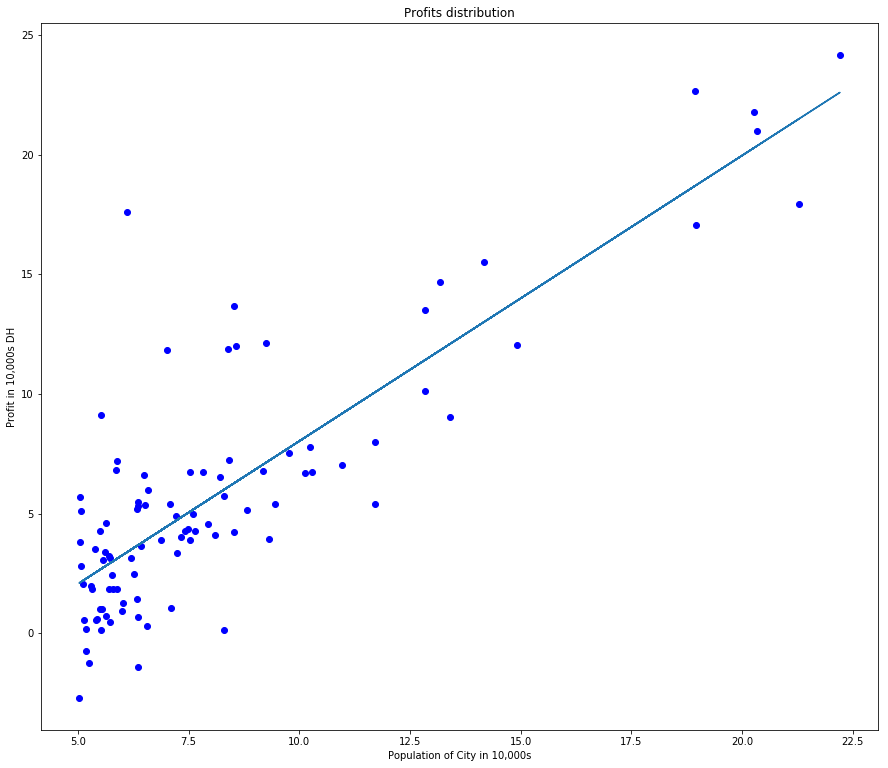

In [81]:
# We will plot the data
matplotlib.rcParams['figure.figsize'] = (15.0, 13.0)

scatter(data[:, 0], data[:, 1], marker='o', c='b')
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in 10,000s DH')

#Plot the results
result = new_X.dot(W).flatten()
plot(data[:, 0], result)
show()

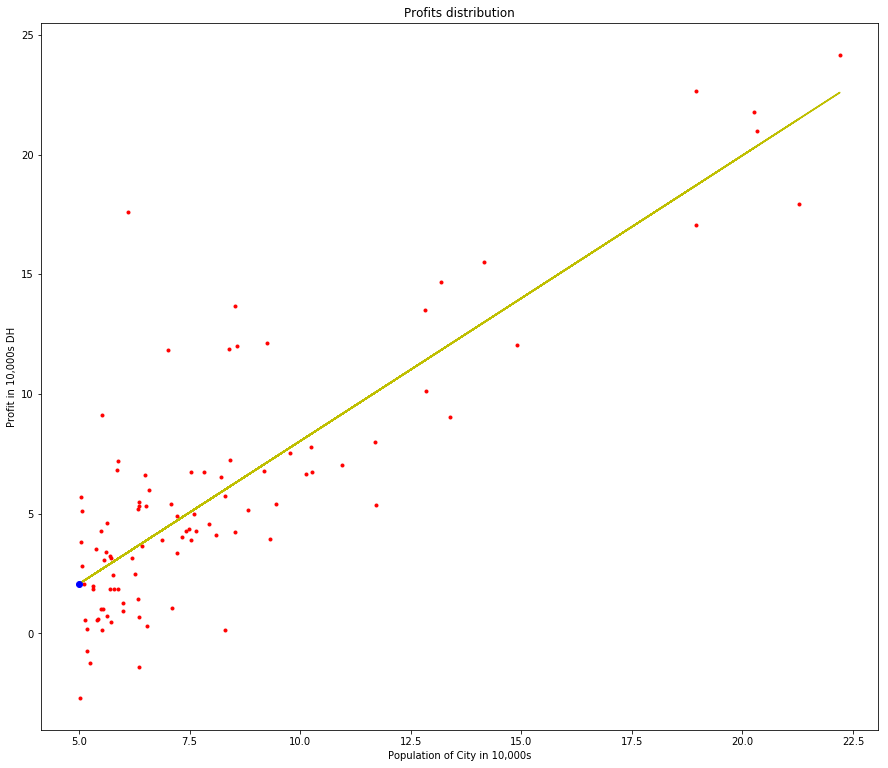

In [93]:
#Plot the data

scatter(data[:, 0], data[:, 1], marker='.', c='r')
title('Profits distribution')
xlabel('Population of City in 10,000s')
ylabel('Profit in 10,000s DH')


#plot the hypotesis 

result = new_X.dot(W).flatten()
plot(data[:, 0], result,c='y')

#predict and print 

x,y = predict(5000)
plot(x,y,marker='o',c='b')
show()